<a href="https://colab.research.google.com/github/lekhangNguyen/Python_Data_Processing/blob/main/Data_Processing_with_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [134]:
## upload the file (workp place satisfaction)
from google.colab import files
upload = files.upload()

In [135]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import openpyxl
import statsmodels.formula.api as smf

In [30]:
## read the excel file
df = pd.read_excel('WorkPlaceSatisfactionSurveyData.xlsx')
df.head()

,number,gender,age,family,education,years_of_service,salary,sat_management,sat_colleques,sat_workingEnvironment,sat_salary,sat_tasks,healtcare,holidayCabin,gym,muscleCare
0,1,1,38,1,1.0,22.0,3587,3,3.0,3,3,3,NaN,NaN,NaN,NaN
1,2,1,29,2,2.0,10.0,2963,1,5.0,2,1,3,NaN,NaN,NaN,NaN
2,3,1,30,1,1.0,7.0,1989,3,4.0,1,1,3,1.0,NaN,NaN,NaN
3,4,1,36,2,1.0,14.0,2144,3,3.0,3,3,3,1.0,NaN,NaN,NaN
4,5,1,24,1,2.0,4.0,2183,2,3.0,2,1,2,1.0,NaN,NaN,NaN


In [31]:
## showing number of records
print(f'DATASET CONTAINS:\n{df.shape[0]} ROWS\n{df.shape[1]} COLUMNS\n')


DATASET CONTAINS:
82 ROWS
16 COLUMNS



In [32]:
## checking duplicate values
duplicates = df.duplicated()
total_duplicate = df.duplicated().sum()

print(f'DATASET TOTAL DUPLICATE RECORDS:\n{total_duplicate}\n')

DATASET TOTAL DUPLICATE RECORDS:
0



In [33]:
## checking missing values
total_missing_value = df.isnull().sum().sum()  ## total missing values
missing_value_column = df.isnull().sum()  ## total missing values in each column

print(f'DATASET HAS TOTAL:\n{total_missing_value} missing values\n')
print(f'DATASET CONTAINS MISSING VALUE BY COLUMNS\n{missing_value_column}')

DATASET HAS TOTAL:
234 missing values

DATASET CONTAINS MISSING VALUE BY COLUMNS
number                     0
gender                     0
age                        0
family                     0
education                  1
years_of_service           2
salary                     0
sat_management             0
sat_colleques              1
sat_workingEnvironment     0
sat_salary                 0
sat_tasks                  0
healtcare                 35
holidayCabin              62
gym                       73
muscleCare                60
dtype: int64


In [48]:
## using data variable to make sure the handling process works correctly
df
columns = df.columns
for col in columns:
  ## if columns dtype is int or float. replace all missing values with 0
  if df[col].dtype in ['float64', 'int64']:
    df[col].fillna(0, inplace=True)

df.isnull().sum()

<ipython-input-48-a9957ba1c1a7>:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(0, inplace=True)


,0
number,0
gender,0
age,0
family,0
education,0
years_of_service,0
salary,0
sat_management,0
sat_colleques,0
sat_workingEnvironment,0


# **1. Which gender is more likely to have salary satisfaction**

In [126]:
df.sort_values(by=['sat_salary'], ascending=False).head()

,number,gender,age,family,education,years_of_service,salary,sat_management,sat_colleques,sat_workingEnvironment,sat_salary,sat_tasks,healtcare,holidayCabin,gym,muscleCare,gender_label
36,37,2,56,2,2.0,17.0,2729,5,5.0,5,5,5,0.0,0.0,0.0,1.0,Female
24,25,1,43,2,3.0,1.0,2925,4,4.0,4,4,4,0.0,1.0,0.0,0.0,Male
14,15,1,53,2,3.0,12.0,3393,4,4.0,4,4,4,0.0,1.0,0.0,0.0,Male
23,24,1,36,1,3.0,7.0,4446,3,4.0,3,4,5,0.0,0.0,0.0,0.0,Male
22,23,1,44,2,1.0,27.0,3510,4,4.0,4,4,4,0.0,1.0,0.0,0.0,Male


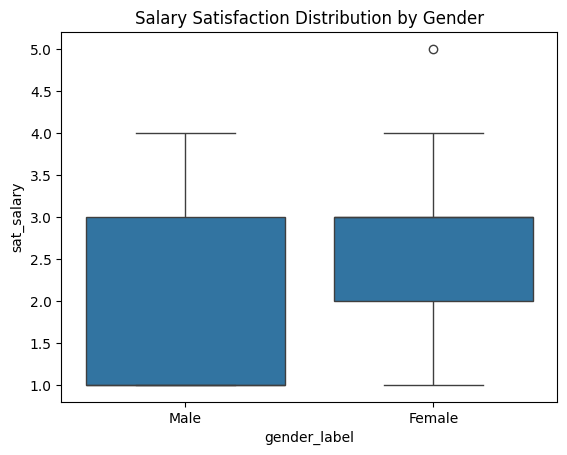

In [120]:
# visualize salary satisfaction ditribution by gender_label.
sns.boxplot(x='gender_label', y='sat_salary', data=df)
plt.title('Salary Satisfaction Distribution by Gender')
plt.show()

Interpretation:

# **2. How does employee satisfaction with management, colleagues, and the working environment correlate with overall job satisfaction?**

In [83]:
## calculating the correlation matrix of all satisfaction factors in the dataset
satisfaction_columns = ['sat_salary', 'sat_tasks', 'sat_management', 'sat_colleques', 'sat_workingEnvironment']
correlation_matrix = df[satisfaction_columns].corr()

print(correlation_matrix)

                        sat_salary  sat_tasks  sat_management  sat_colleques  \
sat_salary                1.000000   0.479884        0.540228       0.129247   
sat_tasks                 0.479884   1.000000        0.456933       0.173797   
sat_management            0.540228   0.456933        1.000000       0.248496   
sat_colleques             0.129247   0.173797        0.248496       1.000000   
sat_workingEnvironment    0.538940   0.576431        0.584918       0.305785   

                        sat_workingEnvironment  
sat_salary                            0.538940  
sat_tasks                             0.576431  
sat_management                        0.584918  
sat_colleques                         0.305785  
sat_workingEnvironment                1.000000  


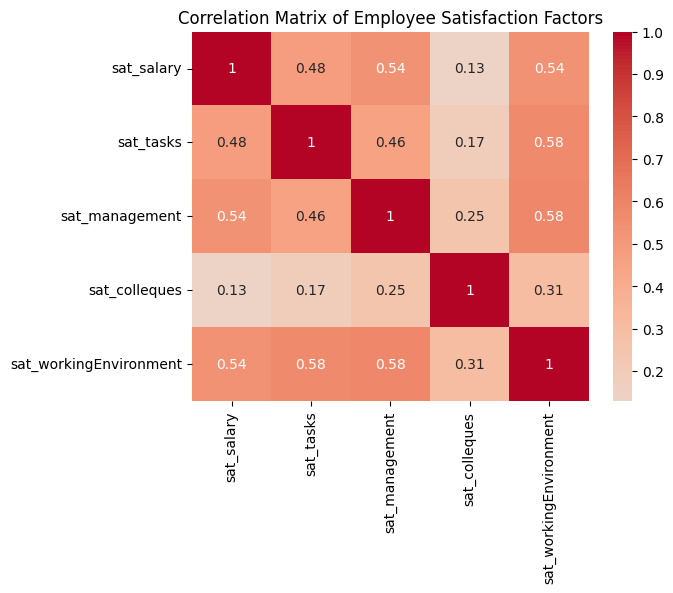

In [86]:
## visualizing the correlation matrix using heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix of Employee Satisfaction Factors')
plt.show()

Interpretation:

# **3. Does participation in company-provided benefits like healthcare, holiday cabins, gym, or muscle care correlate with employee satisfaction or retention?**

In [88]:
benefit_columns = ['healtcare', 'holidayCabin', 'gym','muscleCare']
correlation_matrix = df[benefit_columns + satisfaction_columns].corr()

print(correlation_matrix)

                        healtcare  holidayCabin       gym  muscleCare  \
healtcare                1.000000     -0.371092 -0.091381    0.355600   
holidayCabin            -0.371092      1.000000 -0.108576   -0.151637   
gym                     -0.091381     -0.108576  1.000000    0.051543   
muscleCare               0.355600     -0.151637  0.051543    1.000000   
sat_salary              -0.338419      0.329265  0.177062    0.014589   
sat_tasks               -0.382963      0.357264  0.046614   -0.087051   
sat_management          -0.278183      0.318103  0.128028   -0.061280   
sat_colleques           -0.359678      0.236727  0.079259   -0.126265   
sat_workingEnvironment  -0.436390      0.435652  0.068803   -0.067840   

                        sat_salary  sat_tasks  sat_management  sat_colleques  \
healtcare                -0.338419  -0.382963       -0.278183      -0.359678   
holidayCabin              0.329265   0.357264        0.318103       0.236727   
gym                       0.1

In [91]:
## focusing on correlations between benefits and satisfaction with benefit colummns as Row, satisfaction columns as Column
benefit_satisfaction_corr = correlation_matrix.loc[benefit_columns, satisfaction_columns]
print(benefit_satisfaction_corr)

              sat_salary  sat_tasks  sat_management  sat_colleques  \
healtcare      -0.338419  -0.382963       -0.278183      -0.359678   
holidayCabin    0.329265   0.357264        0.318103       0.236727   
gym             0.177062   0.046614        0.128028       0.079259   
muscleCare      0.014589  -0.087051       -0.061280      -0.126265   

              sat_workingEnvironment  
healtcare                  -0.436390  
holidayCabin                0.435652  
gym                         0.068803  
muscleCare                 -0.067840  


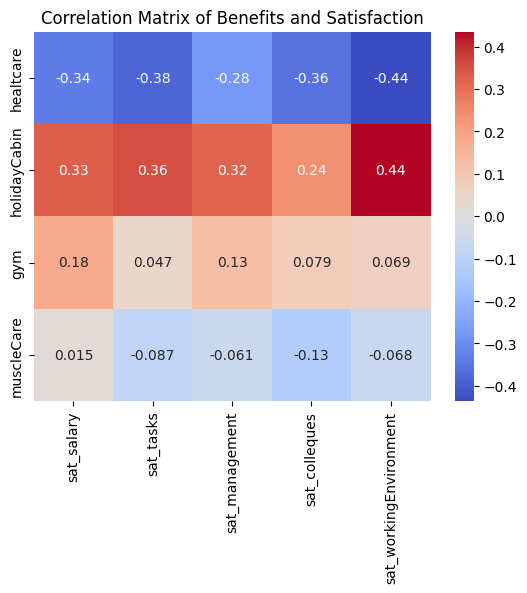

In [92]:
## visualizing using heatmap
sns.heatmap(benefit_satisfaction_corr, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix of Benefits and Satisfaction')
plt.show()

Interpretation:

# **4. The higher the salary, the higher the satisfaction in salary??**

0.31488944257750906


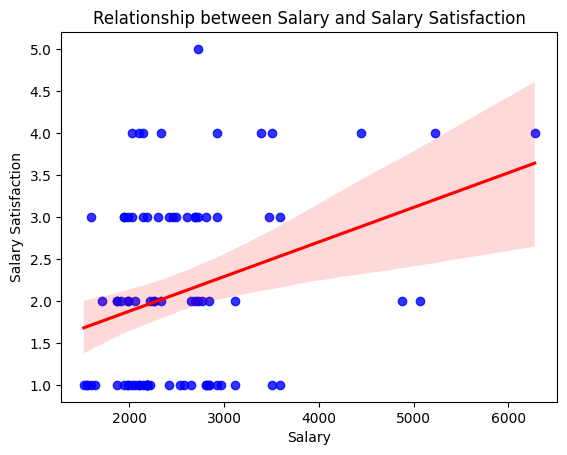

In [111]:
correlation = df['salary'].corr(df['sat_salary'])
print(correlation)
sns.regplot(x='salary', y='sat_salary', data=df, scatter_kws={'color': 'blue'}, line_kws={'color': 'red'})
plt.title('Relationship between Salary and Salary Satisfaction')
plt.xlabel('Salary')
plt.ylabel('Salary Satisfaction')
plt.show()

In [132]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82 entries, 0 to 81
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   number                  82 non-null     int64  
 1   gender                  82 non-null     int64  
 2   age                     82 non-null     int64  
 3   family                  82 non-null     int64  
 4   education               82 non-null     float64
 5   years_of_service        82 non-null     float64
 6   salary                  82 non-null     int64  
 7   sat_management          82 non-null     int64  
 8   sat_colleques           82 non-null     float64
 9   sat_workingEnvironment  82 non-null     int64  
 10  sat_salary              82 non-null     int64  
 11  sat_tasks               82 non-null     int64  
 12  healtcare               82 non-null     float64
 13  holidayCabin            82 non-null     float64
 14  gym                     82 non-null     floa

Interpretation:

# **5. What is the relationship between years of service and salary, and does it differ across genders?**

In [90]:
## calculating the correlation between years of service and salary
correlation = df['years_of_service'].corr(df['salary'])
print(correlation)

0.24884120540767304


Correlation between years of service and salary: 0.24884120540767304


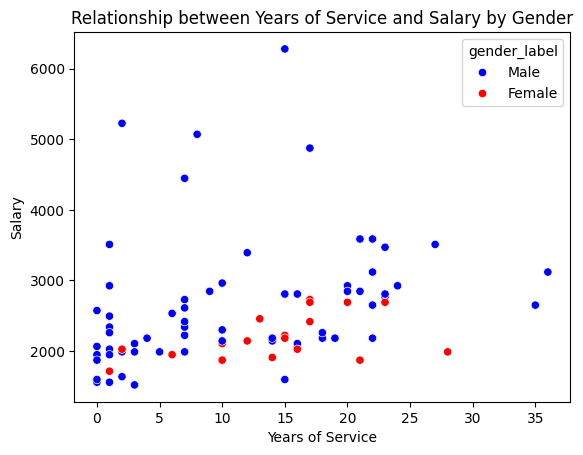

In [76]:
## visualizing the relationship using a scatter plot for
## labeling the gender from (1,2) to (male,female)
df['gender_label'] = df['gender'].map({1:'Male', 2:'Female'})
colors = {"Male":"blue", "Female":"red"}
sns.scatterplot(x='years_of_service', y='salary', hue='gender_label', data=df, palette=colors)

plt.title('Relationship between Years of Service and Salary by Gender')
plt.xlabel('Years of Service')
plt.ylabel('Salary')
plt.show()

In [66]:
model = smf.ols('salary ~ years_of_service * gender', data=df).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 salary   R-squared:                       0.129
Model:                            OLS   Adj. R-squared:                  0.095
Method:                 Least Squares   F-statistic:                     3.844
Date:                Fri, 25 Oct 2024   Prob (F-statistic):             0.0127
Time:                        06:49:25   Log-Likelihood:                -663.24
No. Observations:                  82   AIC:                             1334.
Df Residuals:                      78   BIC:                             1344.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                2

Interpretation: